I was talking with my boss this week who is a huge Mizzouri fan and he was saying the SEC is a better conference than the Big Ten, where my Penn State Nittany Lions play. I disagree. I think the average SEC team is better than the average Big Ten team, but that the good Big Ten teams are better than the good SEC Teams. I'll take Ohio State, Penn State and Michigain over Alabama, Georgia and LSU any day of the week. But that's all just conjecture. Since we've got the data I thought I would look at how many teams from each conference were ranked in the AP poll to see if that would tell us which conference is actually better. 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn

In [ ]:
#Start by reading in the data 
url = "https://raw.githubusercontent.com/sjhawkins24/ap-rankings-scrape/refs/heads/main/CollegeFootballRankings24to20.csv"
data = pd.read_csv(url)

#Take a look at the data 
data.head()
data["AP/CFP"].value_counts()
#Remove the unranked teams 
nan_mask = data["AP/CFP"] != "--"
data_filtered = data[nan_mask] 
#Just confirming the data got filtered 
data_filtered.shape

(1698, 19)

In [ ]:
#What we want to know is the number of ranked teams 
#in each conference 
data_filtered.groupby(["season","CONF"])["Team"].count().to_frame()

In [42]:
#For the graph, lets just grab the SEC and Big 10 teams 
sec_mask = data_filtered["CONF"] == "SEC" 
big_10_mask =  data_filtered["CONF"] == "Big Ten"

two_team_data = data_filtered[sec_mask | big_10_mask]
two_team_data.head()

,Team,date,opponent,win_loss,pass,rush,rec,points_allowed,points_scored,point_differential,home_game,season,CONF,SOR,FPI,AP/CFP,SOS,GC,AVGWP
24,Alabama Crimson Tide,"Sat, Nov 30",Auburn,W,256,104,111,14.0,28.0,-14,True,2024,SEC,17,4,11,20,7,12
25,Alabama Crimson Tide,"Sat, Aug 31",Kentucky,W,200,102,139,0.0,63.0,-63,True,2024,SEC,17,4,11,20,7,12
26,Alabama Crimson Tide,"Sat, Sep 7",Florida,W,194,140,68,16.0,42.0,-26,True,2024,SEC,17,4,11,20,7,12
27,Alabama Crimson Tide,"Sat, Sep 14",Wisconsin,W,196,75,78,10.0,42.0,-32,False,2024,SEC,17,4,11,20,7,12
28,Alabama Crimson Tide,"Sat, Sep 28",Georgia,W,374,117,177,34.0,41.0,-7,True,2024,SEC,17,4,11,20,7,12


<Axes: xlabel='season', ylabel='Count'>

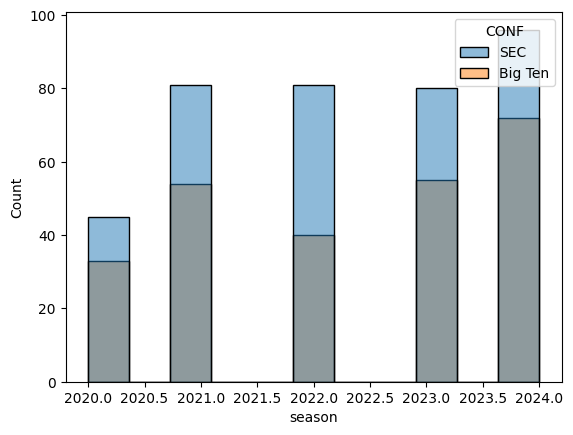

In [44]:

#Now lets do some graphing 
sn.histplot(data = two_team_data, x = "season", hue = "CONF" )

Well, this is really good news if you are an SEC fan. It looks like consistantly there are more SEC teams ranked than Big Ten teams. But this made me wonder, how many of these teams are ranked in the top 5 

In [66]:
#Lets filter to just teams with a top 5 ranking 
two_team_data.head()
two_team_data.loc[:, "AP/CFP"] = pd.to_numeric(two_team_data.loc[:, "AP/CFP"])
top_five_mask = two_team_data["AP/CFP"] < 6
top_five = two_team_data[top_five_mask]
top_five.head()

,Team,date,opponent,win_loss,pass,rush,rec,points_allowed,points_scored,point_differential,home_game,season,CONF,SOR,FPI,AP/CFP,SOS,GC,AVGWP
421,Georgia Bulldogs,"Sat, Sep 14",Kentucky,W,160,79,89,12.0,13.0,-1,False,2024,SEC,4,7,2,1,12,46
422,Georgia Bulldogs,"Sat, Sep 28",Alabama,L,439,55,132,41.0,34.0,7,False,2024,SEC,4,7,2,1,12,46
423,Georgia Bulldogs,"Sat, Oct 5",Auburn,W,240,88,51,13.0,31.0,-18,True,2024,SEC,4,7,2,1,12,46
424,Georgia Bulldogs,College Football Playoff Quarterfinal at the A...,1,N,Football,Football,Football,NaN,NaN,#VALUE!,False,2024,SEC,4,7,2,1,12,46
425,Georgia Bulldogs,"Thu, Jan 2",*,L,234,38,67,23.0,10.0,13,True,2024,SEC,4,7,2,1,12,46


<Axes: xlabel='season', ylabel='Count'>

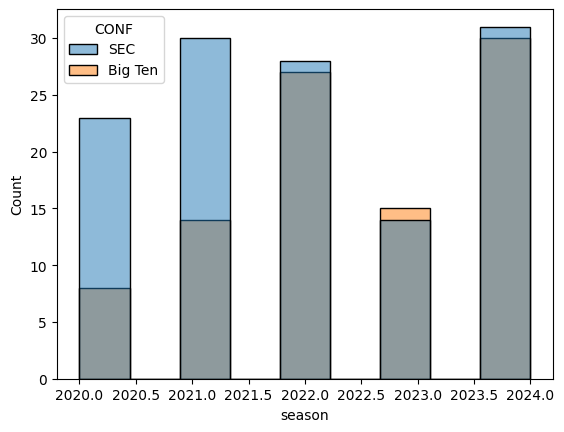

In [68]:
#Now more graphing 
sn.histplot(data = top_five, x = "season", hue = "CONF" )